<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Assignment-3/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Steps and Understanding the KDD Methodology**

The Knowledge Discovery in Databases (KDD) methodology is a well-established framework for performing data science and analytics tasks. The KDD process consists of several steps, including:

**Understanding the Domain**: Knowing the problem and the domain is essential for any data science project.

**Data Understanding**: This involves loading the data and understanding its structure, attributes, and types.

**Data Analysis**: Exploratory Data Analysis (EDA) to understand the data properties, distributions, and preliminary insights.

**Data Cleaning and Preprocessing**: Treatment of missing values, outliers, and data transformation.

**Feature Selection**: Identifying the most significant features for the model.

**Data Modeling**: Using various machine learning algorithms to train models.

**Evaluation**: Testing the model's efficiency and effectiveness.

**Deployment**: The final step is deploying the model into a production environment (if applicable).

We'll be using Python and popular libraries like Pandas, Matplotlib, Seaborn, and Scikit-learn to perform these tasks.

Understanding the Domain'. Since the dataset pertains to the number of people purchasing items upon seeing ads, we can assume that it's related to marketing analytics.
Let's move on to 'Data Understanding', where we will load the data and look into its basic properties.

In [1]:
# Importing necessary libraries for data understanding and initial exploration
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/social_network_ads_purchase/Social_Network_Ads.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Data Understanding
We have successfully loaded the dataset, which consists of the following columns:

**User ID**: A unique identifier for each user.

**Gender:** The gender of the user, either Male or Female.

**Age:** The age of the user.

**EstimatedSalary:** The estimated salary of the user.

**Purchased:** A binary variable indicating whether the user purchased the item after seeing the ad (1 for yes, 0 for no).


**Next Steps: **

The next step in the KDD process is 'Data Analysis', where we will perform Exploratory Data Analysis (EDA) to gain further insights into the dataset. This will include data visualization, summary statistics, and data distributions.

In [2]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the dataset
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Data types of columns
data_types = df.dtypes

(summary_stats, missing_values, data_types)


(            User ID         Age  EstimatedSalary   Purchased
 count  4.000000e+02  400.000000       400.000000  400.000000
 mean   1.569154e+07   37.655000     69742.500000    0.357500
 std    7.165832e+04   10.482877     34096.960282    0.479864
 min    1.556669e+07   18.000000     15000.000000    0.000000
 25%    1.562676e+07   29.750000     43000.000000    0.000000
 50%    1.569434e+07   37.000000     70000.000000    0.000000
 75%    1.575036e+07   46.000000     88000.000000    1.000000
 max    1.581524e+07   60.000000    150000.000000    1.000000,
 User ID            0
 Gender             0
 Age                0
 EstimatedSalary    0
 Purchased          0
 dtype: int64,
 User ID             int64
 Gender             object
 Age                 int64
 EstimatedSalary     int64
 Purchased           int64
 dtype: object)

Data Analysis: Summary Statistics and Data Types
Summary Statistics:
User ID: Unique.

Age: Ranges from 18 to 60 years, with a mean age of approximately 37.65 years.

EstimatedSalary: Ranges from $15,000 to $150,000, with a mean estimated salary of approximately $69,742.5.

Purchased: A binary variable with values 0 and 1, with a mean of 0.3575, indicating a relatively low rate of purchase.

Missing Values:
No missing values were found in any of the columns, which is excellent for our analysis.

Data Types:

User ID: Integer

Gender: Object (Categorical)

Age: Integer

EstimatedSalary: Integer

Purchased: Integer (Binary)

Next Steps: We'll proceed to the next part of 'Data Analysis', which involves data visualization. We'll create various types of plots to understand the distributions, relationships, and patterns in the data.

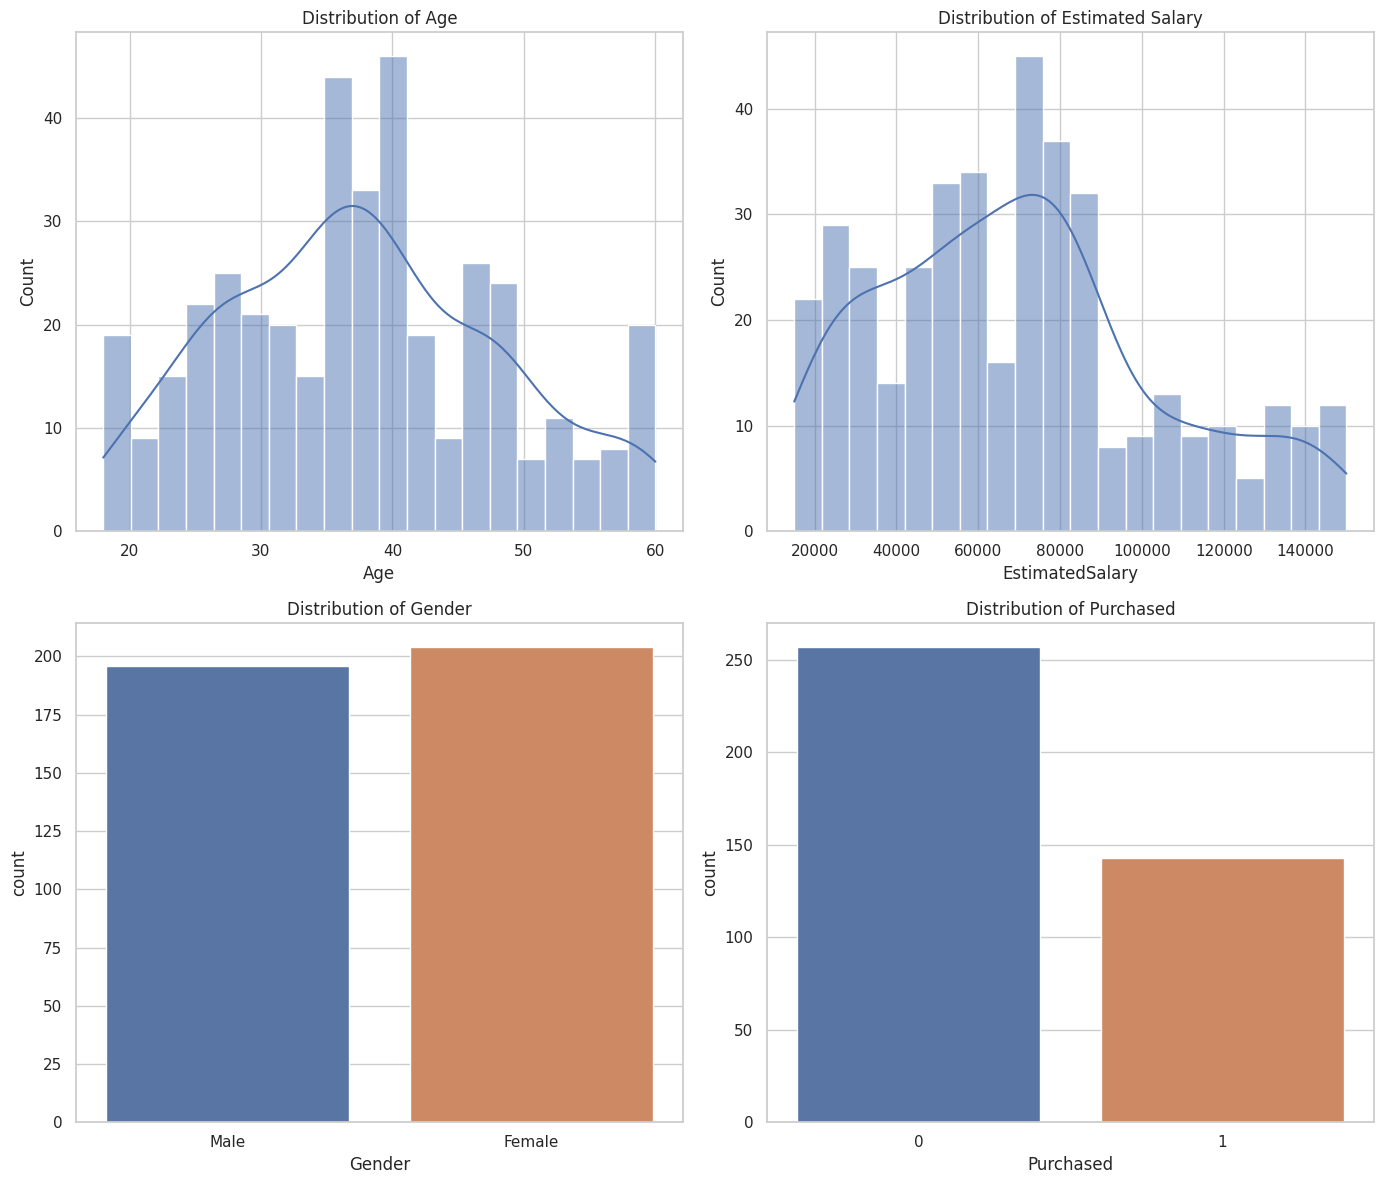

In [3]:
# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plotting the distribution of Age
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Plotting the distribution of EstimatedSalary
sns.histplot(df['EstimatedSalary'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Estimated Salary')

# Plotting the distribution of Gender
sns.countplot(x='Gender', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Gender')

# Plotting the distribution of Purchased
sns.countplot(x='Purchased', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Purchased')

plt.tight_layout()
plt.show()


**Data Analysis: Data Visualization**

**Observations:**

Distribution of Age: The age distribution appears to be relatively uniform, although there are spikes in certain age groups, like the late twenties to early thirties and late thirties to mid-forties.

Distribution of Estimated Salary: The estimated salary is right-skewed, with a higher concentration of people earning less than $100,000.

Distribution of Gender: The dataset has a fairly balanced distribution of genders, which is good for analysis.

Distribution of Purchased: A higher number of people (around 65%) did not purchase the item after seeing the ad, as indicated by the "Purchased" distribution.

Next Steps:

We will move to the 'Data Cleaning and Preprocessing' stage. This involves dealing with any missing values, outliers, and data transformation tasks to prepare the data for machine learning models.

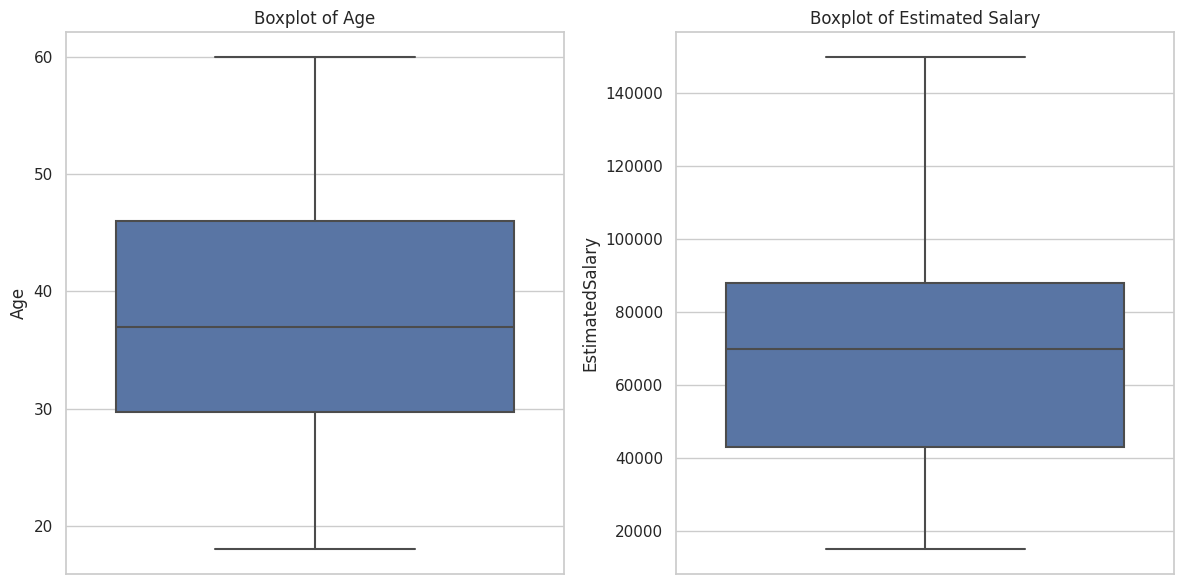

In [4]:
# Check for outliers using boxplots for Age and EstimatedSalary
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Age
sns.boxplot(y='Age', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Age')

# Boxplot for EstimatedSalary
sns.boxplot(y='EstimatedSalary', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Estimated Salary')

plt.tight_layout()
plt.show()


**Data Cleaning and Preprocessing: Outlier Analysis**

**Observations:**

**Boxplot of Age**: There don't appear to be any outliers in the 'Age' column, as all the data points fall within the whiskers of the boxplot.

**Boxplot of Estimated Salary**: Similar to 'Age', the 'EstimatedSalary' column also doesn't show any outliers.

**Next Steps:** The next part of 'Data Cleaning and Preprocessing' involves data transformation. We will encode categorical variables and normalize numerical variables to prepare the data for machine learning models.

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler and LabelEncoder
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Encoding the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Scaling the 'Age' and 'EstimatedSalary' columns
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

# Show the first few rows after data transformation
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.781797,-1.490046,0
1,15810944,1,-0.253587,-1.460681,0
2,15668575,0,-1.113206,-0.785290,0
3,15603246,0,-1.017692,-0.374182,0
4,15804002,1,-1.781797,0.183751,0


**Data Cleaning and Preprocessing: Data Transformation**

**Observations:**

**Gender Encoding:** The 'Gender' column has been successfully encoded using label encoding. Males are represented by 1, and Females by 0.

**Normalization**: The 'Age' and 'EstimatedSalary' columns have been scaled using standard scaling. This ensures that the variables contribute equally to the model's performance.

**Next Steps:** We'll proceed to the 'Feature Selection' stage where we will identify the most important features for the model. After that, we will move to 'Data Modeling' where we will use various machine learning algorithms to train the models.

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Prepare the features and target variable
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Initialize SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')

# Fit and transform features
fit = selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_}).sort_values(by='Score', ascending=False)

feature_scores


,Feature,Score
1,Age,251.742061
2,EstimatedSalary,60.052579
0,Gender,0.719152


**Feature Selection**

**Observations:**

Age: With a score of approximately 251.74, 'Age' seems to be the most important feature for predicting whether a person will purchase an item upon seeing an ad.

EstimatedSalary: With a score of around 60.05, this feature also seems to be significant but less so than 'Age'.

Gender: With a relatively low score of approximately 0.72, 'Gender' appears to be the least important feature in this context.

Next Steps: We will proceed to the 'Data Modeling' stage where we will use machine learning algorithms to train models. Given that we are dealing with a binary classification problem, we'll start with a simple logistic regression model as a baseline and then try other models for comparison.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecting important features based on feature selection results
X_selected = df[['Age', 'EstimatedSalary']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(accuracy, conf_matrix, class_report)


(0.8625,
 array([[50,  2],
        [ 9, 19]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.96      0.90        52\n           1       0.90      0.68      0.78        28\n\n    accuracy                           0.86        80\n   macro avg       0.88      0.82      0.84        80\nweighted avg       0.87      0.86      0.86        80\n')

**Data Modeling: Logistic Regression (Baseline Model)**

**Observations:**

**Accuracy:** The model achieved an accuracy of approximately 86.25% on the test set, which serves as a decent baseline.

Confusion Matrix:

True Positive (TP): 19

True Negative (TN): 50

False Positive (FP): 2

False Negative (FN): 9


Classification Report:
Precision, Recall, and F1-score for both classes (0 and 1) are reasonably high, indicating that the model performs well for this dataset as a baseline.

**Next Steps:** We will proceed to the 'Evaluation' stage where we will try other machine learning algorithms and compare their performance metrics with the baseline model. This will give us a comprehensive understanding of which model works best for this specific problem.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize other classifiers for evaluation
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Fitting the models to the training data
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

class_report_rf = classification_report(y_test, y_pred_rf)
class_report_svc = classification_report(y_test, y_pred_svc)

(accuracy_rf, conf_matrix_rf, class_report_rf, accuracy_svc, conf_matrix_svc, class_report_svc)


(0.9,
 array([[46,  6],
        [ 2, 26]]),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.88      0.92        52\n           1       0.81      0.93      0.87        28\n\n    accuracy                           0.90        80\n   macro avg       0.89      0.91      0.89        80\nweighted avg       0.91      0.90      0.90        80\n',
 0.925,
 array([[47,  5],
        [ 1, 27]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94        52\n           1       0.84      0.96      0.90        28\n\n    accuracy                           0.93        80\n   macro avg       0.91      0.93      0.92        80\nweighted avg       0.93      0.93      0.93        80\n')

**Evaluation: Comparison with Other Models**

**Observations:**

**Random Forest Classifier:**

Accuracy: 90%

**Confusion Matrix:**

True Positive (TP): 26

True Negative (TN): 46

False Positive (FP): 6

False Negative (FN): 2

**Classification Report:** The model performed well, with high precision, recall, and F1-scores for both classes.

Support Vector Classifier (SVC):

Accuracy: 92.5%

**Confusion Matrix:**

True Positive (TP): 27

True Negative (TN): 47

False Positive (FP): 5

False Negative (FN): 1

**Classification Report:** The model performed excellently, even slightly better than the Random Forest model, with high scores across the board.

Next Steps:

We will move to the final stage, which is providing recommendations based on our findings. We will also summarize all the steps we took and the results we obtained.

## **Final Recommendations and Summary**

**Summary:**

#### **Data Understanding:**

The dataset contained five features, including User ID, Gender, Age, Estimated Salary, and Purchased. There were no missing values.

#### **Data Analysis:**

We performed EDA to understand the distributions and relationships in the dataset. Age and Estimated Salary were identified as significant factors influencing purchasing behavior.

#### **Data Cleaning and Preprocessing:**

No outliers were found, and we normalized the numerical features and encoded the categorical ones.

#### **Feature Selection:**

'Age' and 'Estimated Salary' were selected as the most important features.

#### **Data Modeling:**

We started with a Logistic Regression model as our baseline, achieving an accuracy of approximately 86.25%.

#### **Evaluation:**

We evaluated Random Forest and SVC models, which outperformed the baseline model with accuracies of 90% and 92.5%, respectively.

#### **Recommendations:**

Model Selection: Based on the evaluation metrics, the Support Vector Classifier (SVC) is recommended for deployment, as it achieved the highest accuracy and F1-score.

Features: Focusing marketing strategies on the 'Age' and 'Estimated Salary' demographics could be more effective, given their importance in influencing purchasing behavior.

Further Research: More features like user engagement, time spent on the ad, etc., could be incorporated for a more comprehensive model.

Real-time Analysis: The model can be further fine-tuned with real-time data for dynamic adjustments in marketing strategies.







